In [16]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (16.0, 7.0)

In [17]:
def getTestData(h):
    def testFunction(point):
        x = point[0]
        y = point[1]
        x_sq = np.square(x)
        y_sq = np.square(y)
        first_comp = np.square(x_sq + y - 11)
        second_comp = np.square(x + y_sq - 7)
        result = first_comp + second_comp
        return result
    def getGradientIn(point):
        x = point[0]
        y = point[1]
        dx = 4*x*(x*x+y-11)+2*(x+y*y-7)
        dy = 2*(x*x+y-11)+4*y*(x+y*y-7)
        return np.array([dx, dy])
    def getAntiGradientIn(point):
        g = getGradientIn(point)
        return -getGradientIn(point)
    return testFunction, getGradientIn, getAntiGradientIn

In [18]:
def gradient_descent_step(w, lambd):
    w = w - g(w)*lambd
    return w

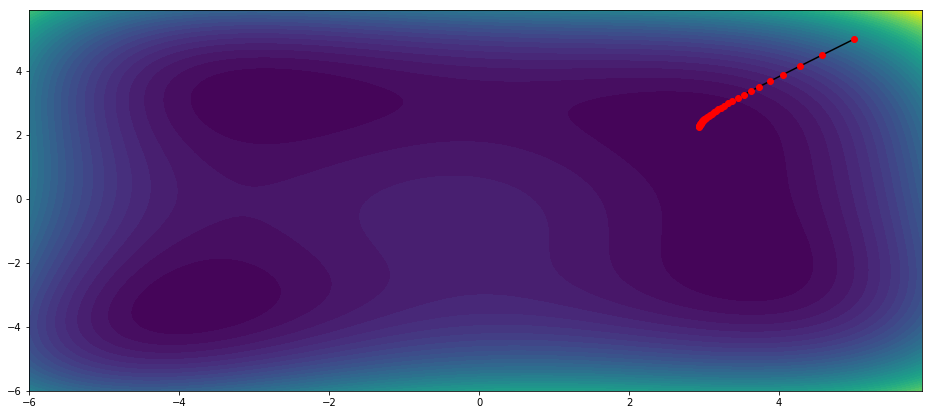

37


In [19]:
x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
xx, yy = np.meshgrid(x, y)
f, g, a = getTestData(1e-10)
xravel = np.ravel(xx)
yravel = np.ravel(yy)
points = list(zip(xravel, yravel))
z = np.array([ f(point) for point in points ])
zz = z.reshape(xx.shape)
h = plt.contourf(xx, yy, zz, 40)

w = [5,5]
alpha = 0.01
delta = 2*alpha
i=0;
maxi = 10000;

path = [w]
while delta > alpha:
    w = gradient_descent_step(w, 0.001)
    path.append(w)
    delta = np.linalg.norm(path[-1] - path[-2])
    i+=1
    if(i>maxi):
        break
x_list = [x for [x, y] in path]
y_list = [y for [x, y] in path]

plt.plot(x_list, y_list, 'k', x_list, y_list, 'ro')
plt.show()

print(i)

In [20]:
def momentum_gradient_descent_step(w, v, lambd, mu):
    v = mu*v + lambd*g(w)
    w = w - v
    return (w, v)

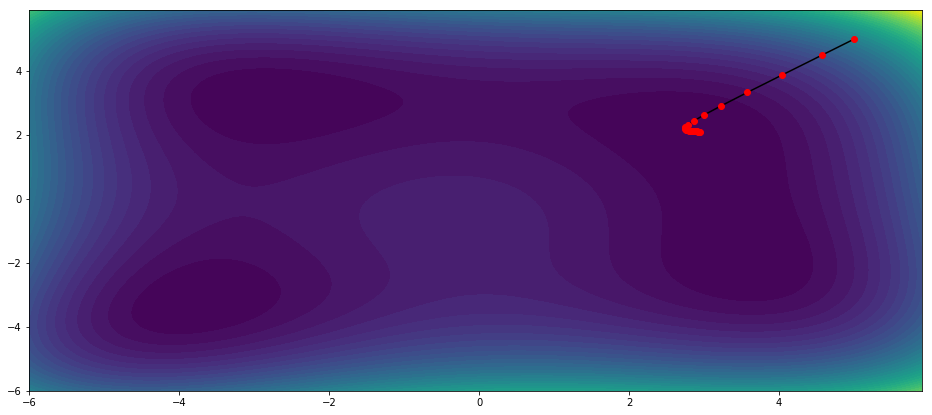

21


In [21]:
x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
xx, yy = np.meshgrid(x, y)
f, g, a = getTestData(1e-10)
xravel = np.ravel(xx)
yravel = np.ravel(yy)
points = list(zip(xravel, yravel))
z = np.array([ f(point) for point in points ])
zz = z.reshape(xx.shape)
h = plt.contourf(xx, yy, zz, 40)

w = np.array([5,5])
v = np.array([0,0])
alpha = 0.01
delta = 2*alpha
i=0;
maxi = 10000;

path = [w]
while delta > alpha:
    w, v = momentum_gradient_descent_step(w, v, 0.001, 0.55)
    path.append(w)
    delta = np.linalg.norm(path[-1] - path[-2])
    i+=1
    if(i>maxi):
        break
x_list = [x for [x, y] in path]
y_list = [y for [x, y] in path]

plt.plot(x_list, y_list, 'k', x_list, y_list, 'ro')
plt.show()

print(i)

In [22]:
def nesterov_gradient_descent_step(w, v, lambd, mu):
    v = mu*v + lambd*g(w - mu*v)
    w = w - v
    return (w, v)

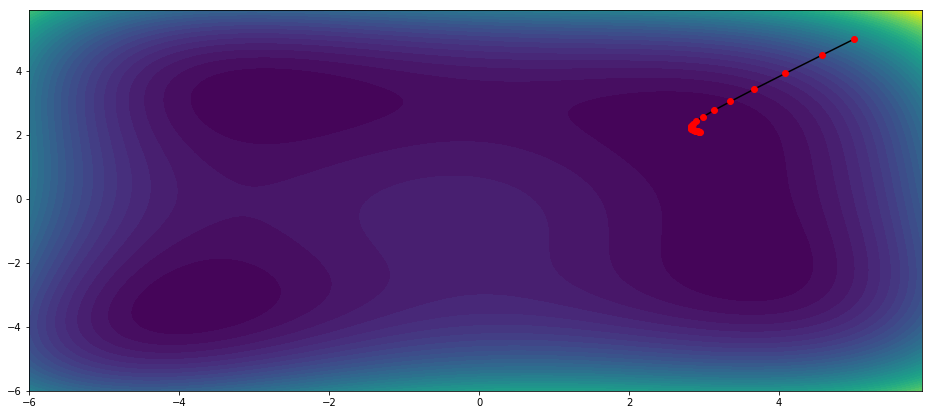

21


In [23]:
x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
xx, yy = np.meshgrid(x, y)
f, g, a = getTestData(1e-10)
xravel = np.ravel(xx)
yravel = np.ravel(yy)
points = list(zip(xravel, yravel))
z = np.array([ f(point) for point in points ])
zz = z.reshape(xx.shape)
h = plt.contourf(xx, yy, zz, 40)

w = np.array([5,5])
v = np.array([0,0])
alpha = 0.01
delta = 2*alpha
i=0;
maxi = 10000;

path = [w]
while delta > alpha:
    w, v = nesterov_gradient_descent_step(w, v, 0.001, 0.6)
    path.append(w)
    delta = np.linalg.norm(path[-1] - path[-2])
    i+=1
    if(i>maxi):
        break
x_list = [x for [x, y] in path]
y_list = [y for [x, y] in path]

plt.plot(x_list, y_list, 'k', x_list, y_list, 'ro')
plt.show()

print(i)

In [24]:
def adagrad_gradient_descent_step(w, G, lambd):
    grad = g(w)
    G = G + grad * grad
    deltaw = lambd * grad / np.sqrt(G + 1e-6)
    w = w - deltaw
    return (w, G)

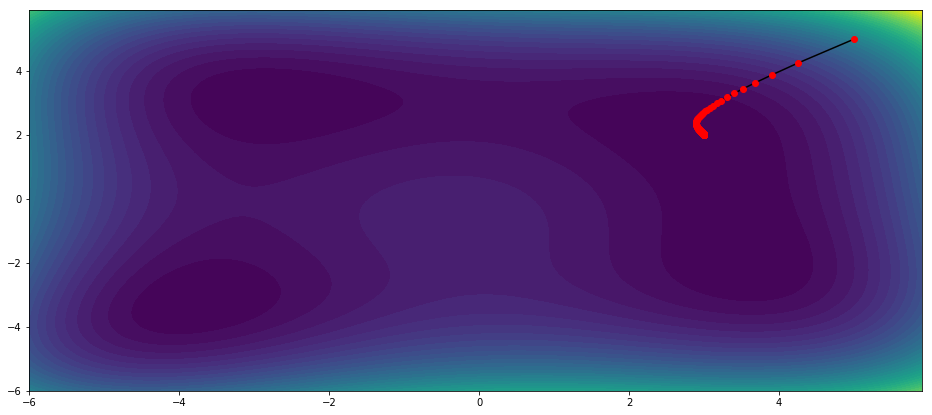

178


In [25]:
x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
xx, yy = np.meshgrid(x, y)
f, g, a = getTestData(1e-10)
xravel = np.ravel(xx)
yravel = np.ravel(yy)
points = list(zip(xravel, yravel))
z = np.array([ f(point) for point in points ])
zz = z.reshape(xx.shape)
h = plt.contourf(xx, yy, zz, 40)

w = np.array([5,5])
G = np.array([0,0])
alpha = 0.0001
delta = 2*alpha
i=0;
maxi = 10000;

path = [w]
while delta > alpha:
    w, G = adagrad_gradient_descent_step(w, G, 0.75)
    path.append(w)
    delta = np.linalg.norm(path[-1] - path[-2])
    i+=1
    if(i>maxi):
        break
x_list = [x for [x, y] in path]
y_list = [y for [x, y] in path]

plt.plot(x_list, y_list, 'k', x_list, y_list, 'ro')
plt.show()

print(i)

In [26]:
def adadelta_gradient_descent_step(w, eG, eDeltaw, rmsDeltaw, mu1, mu2):
    grad = g(w)
    eG = mu1*eG + (1-mu1)*grad*grad
    rmsG = np.sqrt(eG + 1e-5)
    deltaw = rmsDeltaw*grad/rmsG
    w = w - deltaw
    eDeltaw = mu2*eDeltaw + (1-mu2)*deltaw*deltaw
    rmsDeltaw = np.sqrt(eDeltaw + 1e-5)
    return (w, eG, eDeltaw, rmsDeltaw)

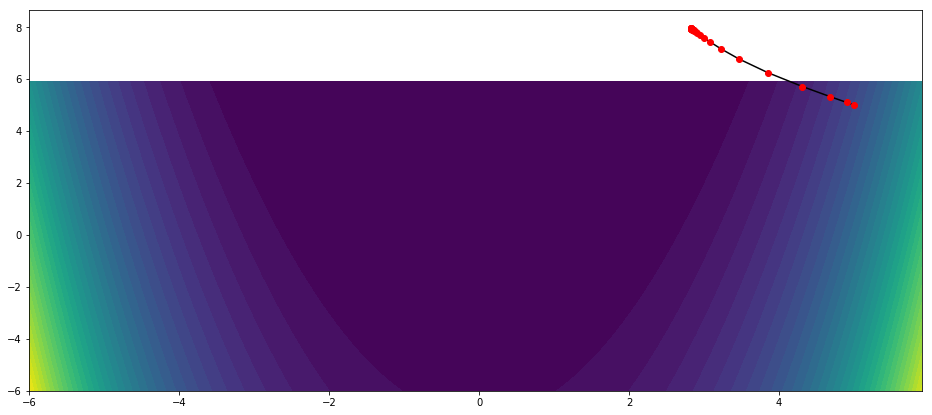

27


In [52]:
x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
xx, yy = np.meshgrid(x, y)
f, g, a = getTestData(1e-10)
xravel = np.ravel(xx)
yravel = np.ravel(yy)
points = list(zip(xravel, yravel))
z = np.array([ f(point) for point in points ])
zz = z.reshape(xx.shape)
h = plt.contourf(xx, yy, zz, 40)

w = np.array([5,5])
eG = np.array([0,0])
eDeltaw = np.array([0,0])
rmsDeltaw = np.array([0.01,0.01])

alpha = 0.001
delta = 2*alpha
i=0;
maxi = 10000;

path = [w]
while delta > alpha:
    w, eG, eDeltaw, rmsDeltaw = adadelta_gradient_descent_step(w, eG, eDeltaw, rmsDeltaw, 0.99, 0.9)
    path.append(w)
    delta = np.linalg.norm(path[-1] - path[-2])
    i+=1
    if(i>maxi):
        break
x_list = [x for [x, y] in path]
y_list = [y for [x, y] in path]

plt.plot(x_list, y_list, 'k', x_list, y_list, 'ro')
plt.show()

print(i)

In [28]:
def adam_gradient_descent_step(w, lambd, m, v, beta1, beta2):
    grad = g(w)
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * grad * grad
    mhat = m / (1 - beta1) 
    vhat = v / (1 - beta2)
    deltaw = lambd*mhat/(np.sqrt(vhat) + 1e-8)
    w = w - deltaw
    return (w, m, v)

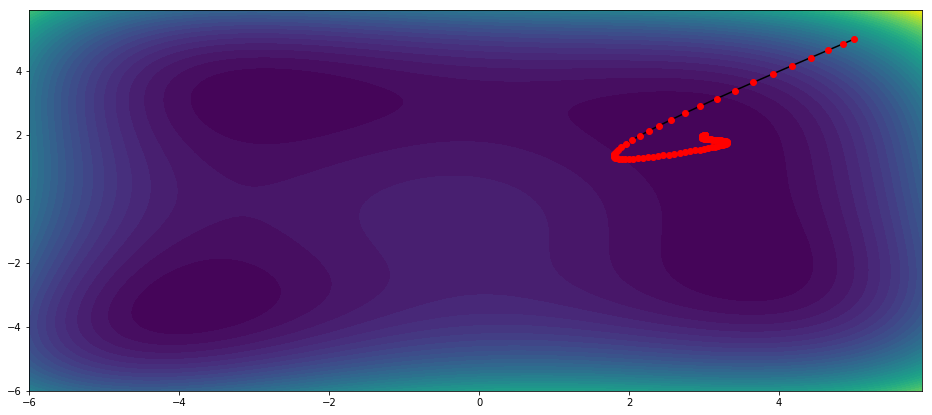

106


In [29]:
x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
xx, yy = np.meshgrid(x, y)
f, g, a = getTestData(1e-10)
xravel = np.ravel(xx)
yravel = np.ravel(yy)
points = list(zip(xravel, yravel))
z = np.array([ f(point) for point in points ])
zz = z.reshape(xx.shape)
h = plt.contourf(xx, yy, zz, 40)

w = np.array([5,5])
m = np.array([0,0])
v = np.array([0,0])

alpha = 0.001
delta = 2*alpha
i=0;
maxi = 10000;

path = [w]
while delta > alpha:
    w, m, v = adam_gradient_descent_step(w, 0.15, m, v, 0.9, 0.999)
    path.append(w)
    delta = np.linalg.norm(path[-1] - path[-2])
    i+=1
    if(i>maxi):
        break
x_list = [x for [x, y] in path]
y_list = [y for [x, y] in path]

plt.plot(x_list, y_list, 'k', x_list, y_list, 'ro')
plt.show()

print(i)

In [30]:
def getTestData(h):
    def testFunction(point):
        x = point[0]
        y = point[1]
        x_sq = np.square(x)
        result = 100*np.square((y - x_sq)) + np.square(x - 1)
        return result
    def getGradientIn(point):
        x = point[0]
        y = point[1]
        dx = -400*x*(y-x*x)+2*(x-1)
        dy = 200*(y-x*x)
        return np.array([dx, dy])
    def getAntiGradientIn(point):
        g = getGradientIn(point)
        return -getGradientIn(point)
    return testFunction, getGradientIn, getAntiGradientIn

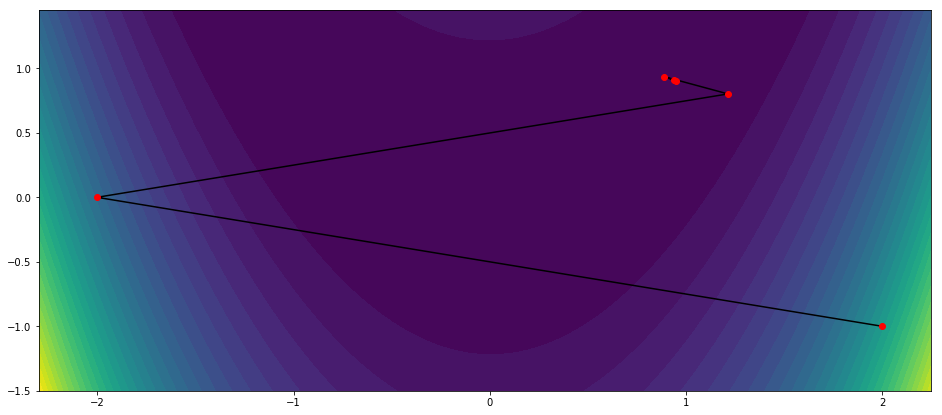

5


In [32]:
x = np.arange(-2.3, 2.3, 0.05)
y = np.arange(-1.5, 1.5, 0.05)
xx, yy = np.meshgrid(x, y)
f, g, a = getTestData(1e-10)
xravel = np.ravel(xx)
yravel = np.ravel(yy)
points = list(zip(xravel, yravel))
z = np.array([ f(point) for point in points ])
zz = z.reshape(xx.shape)
h = plt.contourf(xx, yy, zz, 40)

w = [2.0,-1]
alpha = 0.01
delta = 2*alpha
i=0;
maxi = 1000;

path = [w]
while delta > alpha:
    w = gradient_descent_step(w, 0.001)
    path.append(w)
    delta = np.linalg.norm(path[-1] - path[-2])
    i+=1
    if(i>maxi):
        break
x_list = [x for [x, y] in path]
y_list = [y for [x, y] in path]

plt.plot(x_list, y_list, 'k', x_list, y_list, 'ro')
plt.show()

print(i)

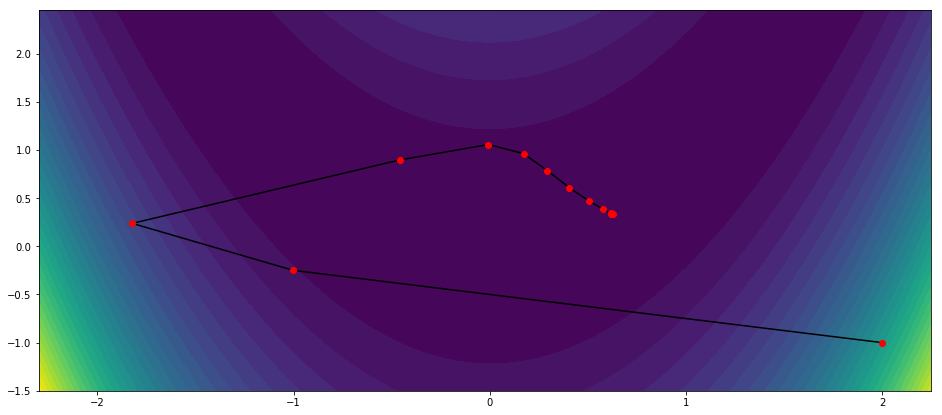

12


In [44]:
x = np.arange(-2.3, 2.3, 0.05)
y = np.arange(-1.5, 2.5, 0.05)
xx, yy = np.meshgrid(x, y)
f, g, a = getTestData(1e-10)
xravel = np.ravel(xx)
yravel = np.ravel(yy)
points = list(zip(xravel, yravel))
z = np.array([ f(point) for point in points ])
zz = z.reshape(xx.shape)
h = plt.contourf(xx, yy, zz, 40)

w = [2.0,-1]
v = np.array([0,0])
alpha = 0.01
delta = 2*alpha
i=0;
maxi = 10000;

path = [w]
while delta > alpha:
    w, v = momentum_gradient_descent_step(w, v, 0.00075, 0.4)
    path.append(w)
    delta = np.linalg.norm(path[-1] - path[-2])
    i+=1
    if(i>maxi):
        break
x_list = [x for [x, y] in path]
y_list = [y for [x, y] in path]

plt.plot(x_list, y_list, 'k', x_list, y_list, 'ro')
plt.show()

print(i)

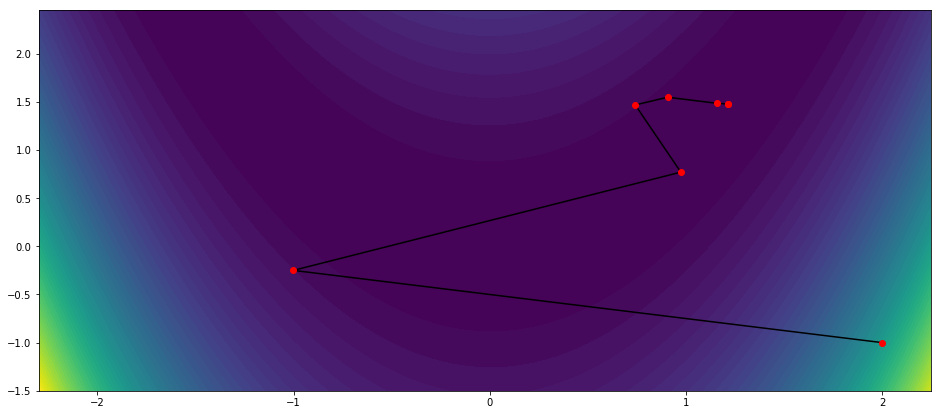

7


In [56]:
x = np.arange(-2.3, 2.3, 0.05)
y = np.arange(-1.5, 2.5, 0.05)
xx, yy = np.meshgrid(x, y)
f, g, a = getTestData(1e-10)
xravel = np.ravel(xx)
yravel = np.ravel(yy)
points = list(zip(xravel, yravel))
z = np.array([ f(point) for point in points ])
zz = z.reshape(xx.shape)
h = plt.contourf(xx, yy, zz, 60)

w = [2.0,-1]
v = np.array([0,0])
alpha = 0.01
delta = 2*alpha
i=0;
maxi = 10000;

path = [w]
while delta > alpha:
    w, v = nesterov_gradient_descent_step(w, v, 0.00075, 0.4)
    path.append(w)
    delta = np.linalg.norm(path[-1] - path[-2])
    i+=1
    if(i>maxi):
        break
x_list = [x for [x, y] in path]
y_list = [y for [x, y] in path]

plt.plot(x_list, y_list, 'k', x_list, y_list, 'ro')
plt.show()

print(i)

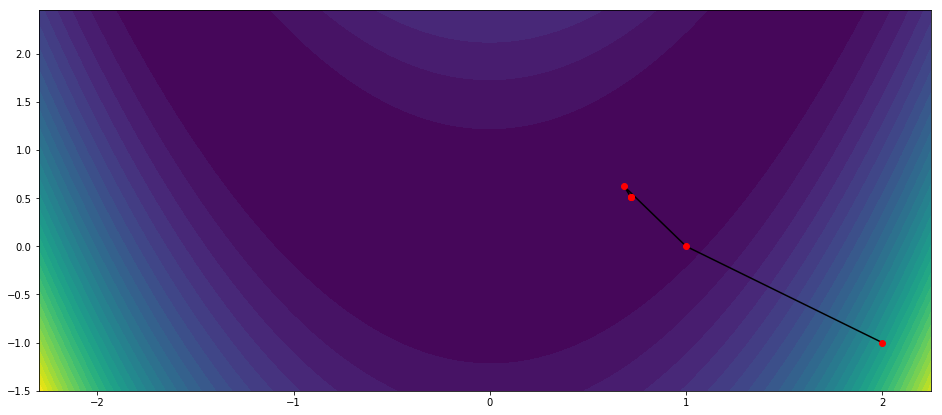

5


In [55]:
x = np.arange(-2.3, 2.3, 0.05)
y = np.arange(-1.5, 2.5, 0.05)
xx, yy = np.meshgrid(x, y)
f, g, a = getTestData(1e-10)
xravel = np.ravel(xx)
yravel = np.ravel(yy)
points = list(zip(xravel, yravel))
z = np.array([ f(point) for point in points ])
zz = z.reshape(xx.shape)
h = plt.contourf(xx, yy, zz, 40)

w = [2.0,-1]
eG = np.array([0,0])
eDeltaw = np.array([0,0])
rmsDeltaw = np.array([0.1,0.1])

alpha = 0.001
delta = 2*alpha
i=0;
maxi = 10000;

path = [w]
while delta > alpha:
    w, eG, eDeltaw, rmsDeltaw = adadelta_gradient_descent_step(w, eG, eDeltaw, rmsDeltaw, 0.99, 0.9)
    path.append(w)
    delta = np.linalg.norm(path[-1] - path[-2])
    i+=1
    if(i>maxi):
        break
x_list = [x for [x, y] in path]
y_list = [y for [x, y] in path]

plt.plot(x_list, y_list, 'k', x_list, y_list, 'ro')
plt.show()

print(i)

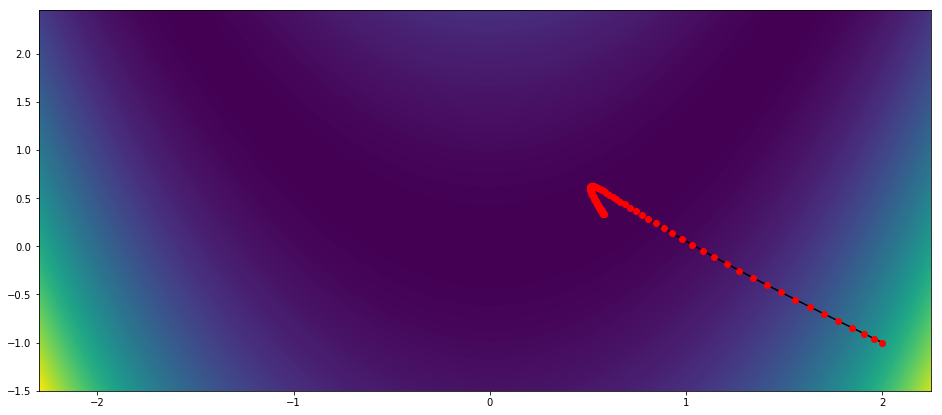

99


In [67]:
x = np.arange(-2.3, 2.3, 0.05)
y = np.arange(-1.5, 2.5, 0.05)
xx, yy = np.meshgrid(x, y)
f, g, a = getTestData(1e-10)
xravel = np.ravel(xx)
yravel = np.ravel(yy)
points = list(zip(xravel, yravel))
z = np.array([ f(point) for point in points ])
zz = z.reshape(xx.shape)
h = plt.contourf(xx, yy, zz, 250)

w = [2.0,-1]
m = np.array([0,0])
v = np.array([0,0])

alpha = 0.001
delta = 2*alpha
i=0;
maxi = 10000;

path = [w]
while delta > alpha:
    w, m, v = adam_gradient_descent_step(w, 0.04, m, v, 0.9, 0.999)
    path.append(w)
    delta = np.linalg.norm(path[-1] - path[-2])
    i+=1
    if(i>maxi):
        break
x_list = [x for [x, y] in path]
y_list = [y for [x, y] in path]

plt.plot(x_list, y_list, 'k', x_list, y_list, 'ro')
plt.show()

print(i)

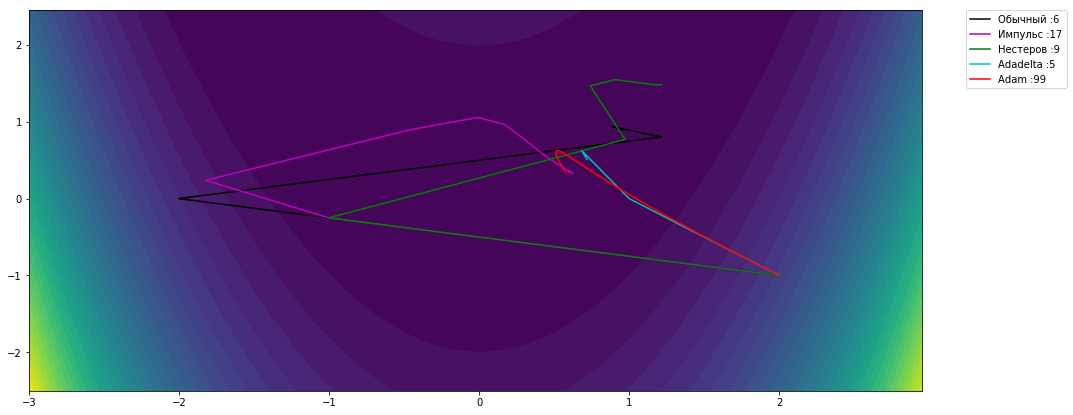

In [90]:
x = np.arange(-3, 3, 0.05)
y = np.arange(-2.5, 2.5, 0.05)
xx, yy = np.meshgrid(x, y)
f, g, a = getTestData(1e-10)
xravel = np.ravel(xx)
yravel = np.ravel(yy)
points = list(zip(xravel, yravel))
z = np.array([ f(point) for point in points ])
zz = z.reshape(xx.shape)
h = plt.contourf(xx, yy, zz, 40)

alpha = 0.001
maxi = 1000

w = [2.0,-1]
delta = 2*alpha
i = 0

path = [w]
while delta > alpha:
    w = gradient_descent_step(w, 0.001)
    path.append(w)
    delta = np.linalg.norm(path[-1] - path[-2])
    i+=1
    if(i>maxi):
        break
x_list_vanilla = [x for [x, y] in path]
y_list_vanilla = [y for [x, y] in path]
i_vanilla = i

w = [2.0,-1]
v = np.array([0,0])
delta = 2*alpha
i = 0

path = [w]
while delta > alpha:
    w, v = momentum_gradient_descent_step(w, v, 0.00075, 0.4)
    path.append(w)
    delta = np.linalg.norm(path[-1] - path[-2])
    i+=1
    if(i>maxi):
        break
x_list_momentum = [x for [x, y] in path]
y_list_momentum = [y for [x, y] in path]
i_momentum = i

w = [2.0,-1]
v = np.array([0,0])
delta = 2*alpha
i = 0

path = [w]
while delta > alpha:
    w, v = nesterov_gradient_descent_step(w, v, 0.00075, 0.4)
    path.append(w)
    delta = np.linalg.norm(path[-1] - path[-2])
    i+=1
    if(i>maxi):
        break
x_list_nestserov = [x for [x, y] in path]
y_list_nestserov = [y for [x, y] in path]
i_nesterov = i

w = [2.0,-1]
eG = np.array([0,0])
eDeltaw = np.array([0,0])
rmsDeltaw = np.array([0.1,0.1])

delta = 2*alpha
i=0

path = [w]
while delta > alpha:
    w, eG, eDeltaw, rmsDeltaw = adadelta_gradient_descent_step(w, eG, eDeltaw, rmsDeltaw, 0.99, 0.9)
    path.append(w)
    delta = np.linalg.norm(path[-1] - path[-2])
    i+=1
    if(i>maxi):
        break
x_list_adadelta = [x for [x, y] in path]
y_list_adadelta = [y for [x, y] in path]
i_adadelta = i

w = [2.0,-1]
m = np.array([0,0])
v = np.array([0,0])

delta = 2*alpha
i=0

path = [w]
while delta > alpha:
    w, m, v = adam_gradient_descent_step(w, 0.04, m, v, 0.9, 0.999)
    path.append(w)
    delta = np.linalg.norm(path[-1] - path[-2])
    i+=1
    if(i>maxi):
        break
x_list_adam = [x for [x, y] in path]
y_list_adam = [y for [x, y] in path]
i_adam = i

plt.plot(x_list_vanilla, y_list_vanilla, 'k', label="Обычный :{}".format(i_vanilla))
plt.plot(x_list_momentum, y_list_momentum, 'm', label="Импульс :{}".format(i_momentum))
plt.plot(x_list_nestserov, y_list_nestserov, 'g', label="Нестеров :{}".format(i_nesterov))
plt.plot(x_list_adadelta, y_list_adadelta, 'c', label="Adadelta :{}".format(i_adadelta))
plt.plot(x_list_adam, y_list_adam, 'r', label="Adam :{}".format(i_adam))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.show()
